# Example 12 Using Neural Network transfer functions (NNTFs)

## Notebook Initialization

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('..') # append DarkHistory's path

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc_file('matplotlibrc_nntf')
%matplotlib inline

<ipython-input-2-c7cada450ee6>:3: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  import matplotlib


In [3]:
from config import load_data
from nntf.load import load_model

## 0. testing

In [4]:
import main

In [5]:
run_config = {}
run_config['DM_process']   = 'decay'
run_config['mDM']          = 1e9
run_config['lifetime']     = 3e25
run_config['primary']      = 'phot_delta'
run_config['backreaction'] = True
run_config['helium_TLA']   = True
run_config['reion_switch'] = True

run_config['start_rs']       = 3000
run_config['end_rs']         = 4
run_config['coarsen_factor'] = 12
run_config['tf_mode']        = 'nn'

run_config['use_tqdm']       = True
run_config['verbose']        = 1
run_config['record_tfs']     = False

In [6]:
soln = main.evolve(**run_config)

****** Loading transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading (NN) transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt/nntf_models
    for propagating photons (compounded)...  Done!
    for propagating photons (propagator)...  Done!
    for low-energy electrons...  Done!
    for low-energy photons...  Done!
****** Loading complete! ******
****** Loading (NN) transfer functions... ******
Using models at /zfs/yitians/darkhistory/DHdata_alt/nntf_models
    for inverse Compton (Thomson)... 

TypeError: __init__() missing 2 required positional arguments: 'value_index' and 'dtype'

In [10]:
eleceng = load_data('binning')['elec']

In [11]:
elecengtf = load_data('dep_tf')['lowengelec'].eng

In [16]:
eleceng[0], elecengtf[0]

(1.029782576515915, 1.029782576544676)

In [15]:
eleceng/elecengtf-1

array([-2.79292145e-11, -1.99740224e-11, -7.72981679e-12,  1.95414795e-11,
       -9.70445946e-12, -1.78563830e-11,  1.71469505e-11, -1.32045486e-11,
       -5.36115596e-12,  5.89484017e-12, -1.26203492e-11,  1.21658239e-12,
        8.43858317e-12,  4.79838391e-13,  8.76454465e-12,  9.05431286e-12,
       -2.45470311e-12,  8.72368844e-12, -9.20397092e-12, -1.40520928e-12,
       -4.56301663e-14,  2.19757545e-12, -7.32081062e-12, -6.50390852e-12,
        4.98956432e-12, -4.82580642e-12,  4.55879778e-12,  6.57696120e-13,
       -1.64424030e-13,  4.67870187e-12, -2.34812170e-12,  2.24065211e-12,
       -7.68274333e-13, -1.90736316e-13,  2.35012010e-12, -9.23594534e-13,
       -2.93964852e-12, -1.22135635e-12, -6.34270414e-13,  1.28563826e-12,
       -5.50004486e-13, -1.40376599e-12, -9.73665593e-13, -1.19093624e-12,
       -1.78934645e-12, -9.15045817e-13, -1.67532654e-12,  2.12496687e-13,
       -8.21565038e-15, -7.32747196e-13, -6.66133815e-13,  6.79900580e-13,
        5.85753668e-13,  

In [ ]:
aa

In [4]:
nntf = load_model('dep_nntf')['hep_p12']

****** Loading (NN) transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt/nntf_models
    for propagating photons (compounded)...  Done!
    for propagating photons (propagator)...  Done!
    for low-energy electrons...  Done!
    for low-energy photons...  Done!
****** Loading complete! ******


In [5]:
%timeit nntf.predict_TF(rs=1500, xH=0, xHe=0)

1.06 s ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 1. Generate a NNTF
We use the coarsened high energy photon transfer function `hep_p12` as an example

In [4]:
hep_p12_nntf = load_model('dep_nntf')['hep_p12']

****** Loading (NN) transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt/nntf_models
    for propagating photons (compounded)...  Done!
    for propagating photons (propagator)...  Done!
    for low-energy electrons...  Done!
    for low-energy photons...  Done!
****** Loading complete! ******


For some value of redshift $rs$=`rs`, Hydrogen ionization fraction $x_\text{HII}$=`xH`, Helium first ionization fraction $x_\text{HeII}$=`xHe`, let the Neural Network (NN) model predict the transfer function value.

In [5]:
rs = 30
xH = 0.3
xHe = 0.05

hep_p12_nntf.predict_TF(rs=rs, xH=xH, xHe=xHe)

Now plot the transfer functions.

<ipython-input-6-92715bb2e18d>:7: RuntimeWarning: divide by zero encountered in log10
  negim = ax.imshow(np.flipud(np.log10(-hep_p12_nntf.TF)), vmax=7, vmin=-10, cmap='viridis', extent=extent)
<ipython-input-6-92715bb2e18d>:7: RuntimeWarning: invalid value encountered in log10
  negim = ax.imshow(np.flipud(np.log10(-hep_p12_nntf.TF)), vmax=7, vmin=-10, cmap='viridis', extent=extent)


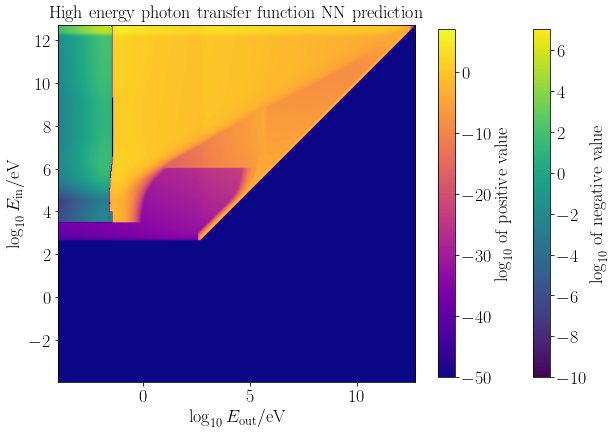

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

extent = np.log10((hep_p12_nntf.abscs[0][0], hep_p12_nntf.abscs[0][-1],
                   hep_p12_nntf.abscs[1][0], hep_p12_nntf.abscs[1][-1]))

posim = ax.imshow(np.flipud(np.log10(np.clip(hep_p12_nntf.TF, 1e-50, 1e50))), vmax=7, vmin=-50, cmap='plasma', extent=extent)
negim = ax.imshow(np.flipud(np.log10(-hep_p12_nntf.TF)), vmax=7, vmin=-10, cmap='viridis', extent=extent)
fig.colorbar(negim, ax=ax, shrink=0.8, label=r'$\log_{10}$ of negative value')
fig.colorbar(posim, ax=ax, shrink=0.8, label=r'$\log_{10}$ of positive value')

ax.set(title='High energy photon transfer function NN prediction',
       xlabel=r'$\log_{10}E_\mathrm{out}/\mathrm{eV}$', ylabel=r'$\log_{10}E_\mathrm{in}/\mathrm{eV}$')
plt.show()

## 2. Comparison with table transfer functions

In [7]:
hep_tf = load_data('dep_tf')['highengphot']
tf_E = load_data('tf_helper')['tf_E']

****** Loading transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******


### High energy photon

In [8]:
rs = 30
xH = 0.3
xHe = 0.05

hep_tf_slice = hep_tf.get_tf(xH, xHe, rs)
z_tb = np.linalg.matrix_power(hep_tf_slice.grid_vals, 12)

hep_E = tf_E.get_val(xH, xHe, rs)[0]
hep_p12_nntf.predict_TF(rs=rs, xH=xH, xHe=xHe, E_arr=hep_E)
z_nn = hep_p12_nntf.TF

z_ediff = z_nn-z_tb
absc_in  = load_data('binning')['phot']
absc_out = load_data('binning')['phot']
for ii, Ein in enumerate(absc_in):
    for io, Eout in enumerate(absc_out):
        z_ediff[ii][io] *= (Eout/Ein)

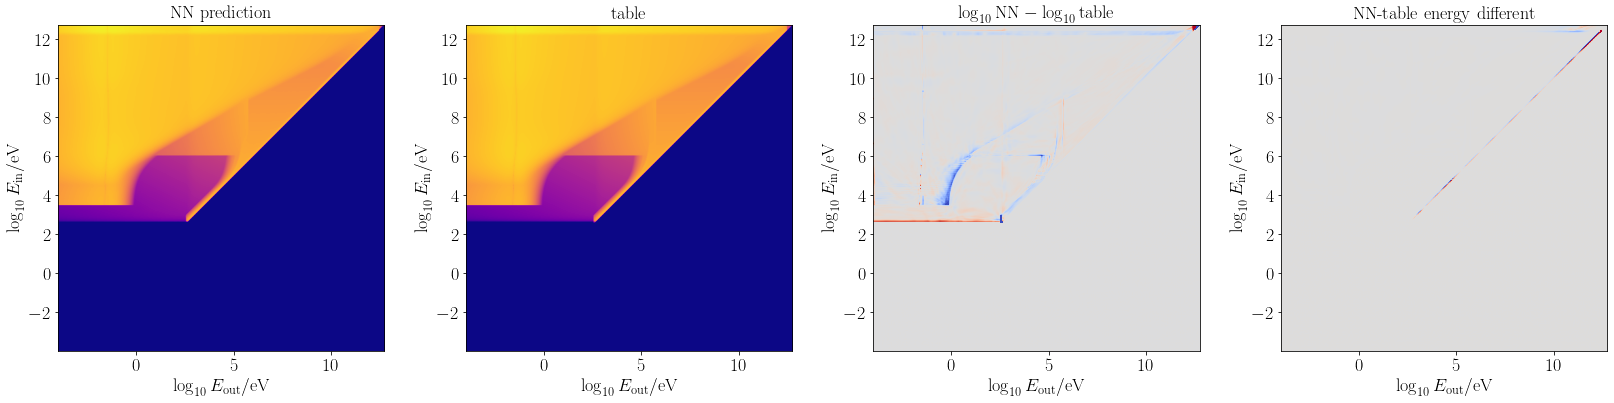

In [9]:
def plot_val(x):
    return np.flipud(np.log10(np.clip(np.abs(x), 1e-50, None)))

fig, axs = plt.subplots(1, 4, figsize=(28,6))

extent = np.log10((hep_p12_nntf.abscs[0][0], hep_p12_nntf.abscs[0][-1],
                   hep_p12_nntf.abscs[1][0], hep_p12_nntf.abscs[1][-1]))
xylabels = dict(xlabel=r'$\log_{10}E_\mathrm{out}/\mathrm{eV}$',
                ylabel=r'$\log_{10}E_\mathrm{in} /\mathrm{eV}$')

axs[0].imshow(plot_val(z_nn), vmin=-50, vmax=7, cmap='plasma', extent=extent)
axs[1].imshow(plot_val(z_tb), vmin=-50, vmax=7, cmap='plasma', extent=extent)
axs[2].imshow(plot_val(z_nn)-plot_val(z_tb), vmin=-1, vmax=1, cmap='coolwarm', extent=extent)
axs[3].imshow(np.flipud(z_ediff), vmin=-0.01, vmax=0.01, cmap='coolwarm', extent=extent)

axs[0].set(title='NN prediction', **xylabels)
axs[1].set(title='table', **xylabels)
axs[2].set(title='$\log_{10}\mathrm{NN}-\log_{10}\mathrm{table}$', **xylabels)
axs[3].set(title='NN-table energy different', **xylabels)
plt.show()

In [2]:
import main

../darkhistory/spec/spectools.py:8: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  import matplotlib.pyplot as plt


In [2]:
run_config = {}
run_config['DM_process']   = 'decay'
run_config['mDM']          = 1e9
run_config['lifetime']     = 3e25
run_config['primary']      = 'phot_delta'
run_config['backreaction'] = True
run_config['helium_TLA']   = True
run_config['reion_switch'] = True

run_config['start_rs']       = 3000
run_config['end_rs']         = 4
run_config['coarsen_factor'] = 12
run_config['tf_mode']        = 'nntf'

run_config['use_tqdm']       = False
run_config['verbose']        = 2
run_config['record_tfs']     = False

In [4]:
soln = main.evolve(**run_config)

coarsen_factor is set to 12 (for NN transfer functions).
****** Loading transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading (NN) transfer functions... ******
Using data at /zfs/yitians/darkhistory/DHdata_alt/nntf_models
    for propagating photons (compounded)...  Done!
    for propagating photons (propagator)...  Done!
    for low-energy electrons...  

TypeError: __init__() missing 1 required positional argument: 'TF_type'